## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
import xgboost as xgb
import plotly.io as pio
pio.renderers.default='notebook'
from IPython.display import Image

## 2. Loading Dataset

In [2]:
df=pd.read_csv('2016.csv')

In [3]:
df.head(1)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.46,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939


In [4]:
df.shape

(157, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Country                          157 non-null object
Region                           157 non-null object
Happiness Rank                   157 non-null int64
Happiness Score                  157 non-null float64
Lower Confidence Interval        157 non-null float64
Upper Confidence Interval        157 non-null float64
Economy (GDP per Capita)         157 non-null float64
Family                           157 non-null float64
Health (Life Expectancy)         157 non-null float64
Freedom                          157 non-null float64
Trust (Government Corruption)    157 non-null float64
Generosity                       157 non-null float64
Dystopia Residual                157 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 16.1+ KB


We can see that the dataset does not contain null values. So it does not need Data Cleaning.

## 3. Feature Engineering

We remove unnecessary columns.

In [6]:
df.drop(['Lower Confidence Interval','Upper Confidence Interval'],axis=1,inplace=True)

Now we rename some of the columns.

In [7]:
df.columns=df.columns.str.lower().str.replace(' ','_')
df.columns=['country', 'region', 'happiness_rank', 'happiness_score', 'economy', 'family', 'health', 'freedom', 'trust','generosity', 'dystopia_residual']

In [8]:
df.head()

,country,region,happiness_rank,happiness_score,economy,family,health,freedom,trust,generosity,dystopia_residual
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [9]:
df.describe()

,happiness_rank,happiness_score,economy,family,health,freedom,trust,generosity,dystopia_residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


## 4. Exploratory Data Analysis

We explore the correlation between all numeric variables.

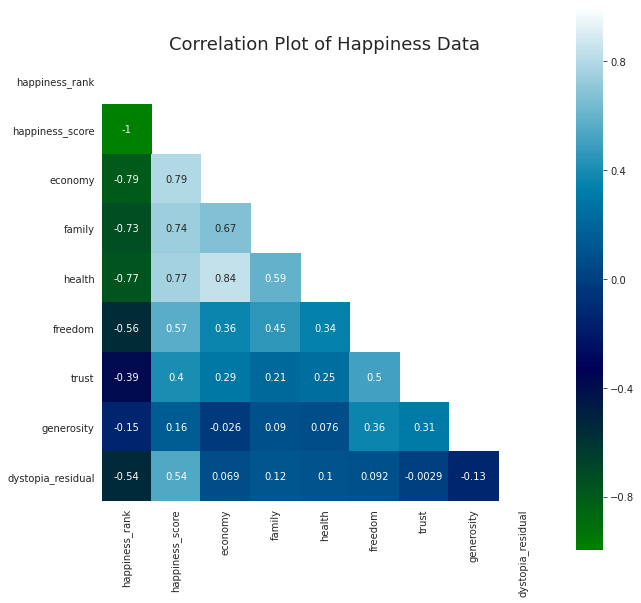

In [10]:
plt.figure(figsize=(10,10))
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='ocean')
plt.title('\nCorrelation Plot of Happiness Data', fontsize=18)
plt.show()

According to the above cor plot, economy plays the most significant role in contributing to happiness. Generosity has the lowest impact on happiness score and happiness_rank has a reverse impact on happiness score.

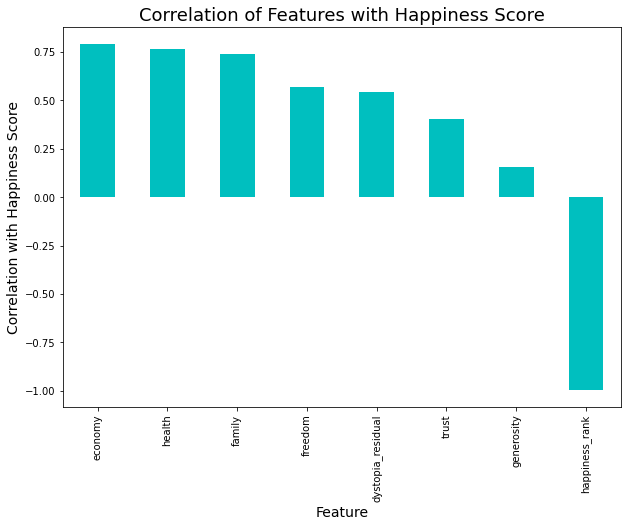

In [11]:
plt.figure(figsize=(10,7))
df.corr()['happiness_score'].sort_values(ascending=False).drop(['happiness_score']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with Happiness Score',fontsize=14)
plt.title('Correlation of Features with Happiness Score',fontsize=18)
plt.show()

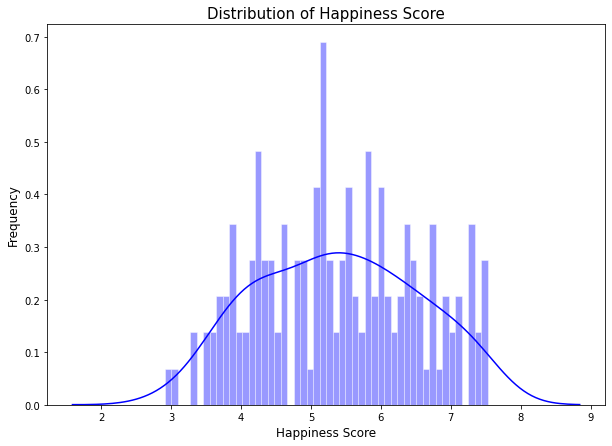

In [12]:
plt.figure(figsize=(10,7))
sns.distplot(df['happiness_score'], bins=50, kde=True, hist_kws=dict(edgecolor='w'), color='b')
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Happiness Score', fontsize=15)
plt.show()

We can observe that most of the happiness_score values are between 5 and 5.5.

We visualize the mean happiness scores of different regions.

In [13]:
df_region=df.groupby('region').mean().sort_values(by='happiness_score', ascending=False).reset_index()

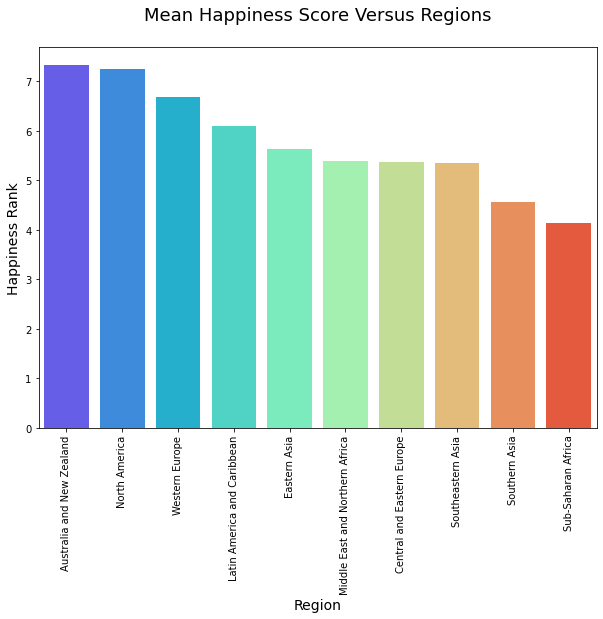

In [14]:
plt.figure(figsize=(10,7))
sns.barplot(x='region', y='happiness_score', data=df_region, palette='rainbow')
plt.xlabel('Region', fontsize=14)
plt.ylabel('Happiness Rank', fontsize=14)
plt.xticks(rotation=90)
plt.title('Mean Happiness Score Versus Regions\n', fontsize=18)
plt.show()

It can be seen that the highest mean happiness score among the regions is related to Australia and New Zealand.

We use strip plot to see the happiness score distribution in different regions.

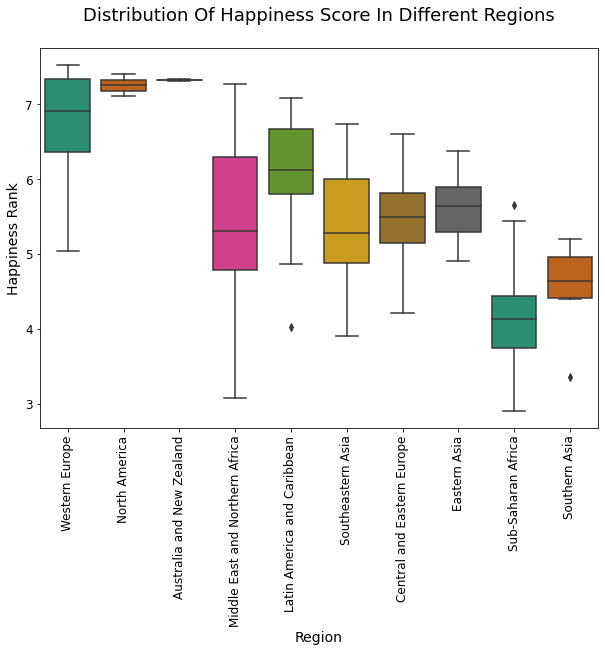

In [15]:
plt.figure(figsize=(10,7))
sns.boxplot(x='region',y='happiness_score',data=df,palette='Dark2')
plt.xlabel('Region', fontsize=14)
plt.ylabel('Happiness Rank', fontsize=14)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution Of Happiness Score In Different Regions\n', fontsize=18)
plt.show()

Now let's visualize thetop 10 countries with the highest happiness scores.

In [16]:
df_country=df.groupby('country').mean().sort_values(by='happiness_score', ascending=False).reset_index().head(10)

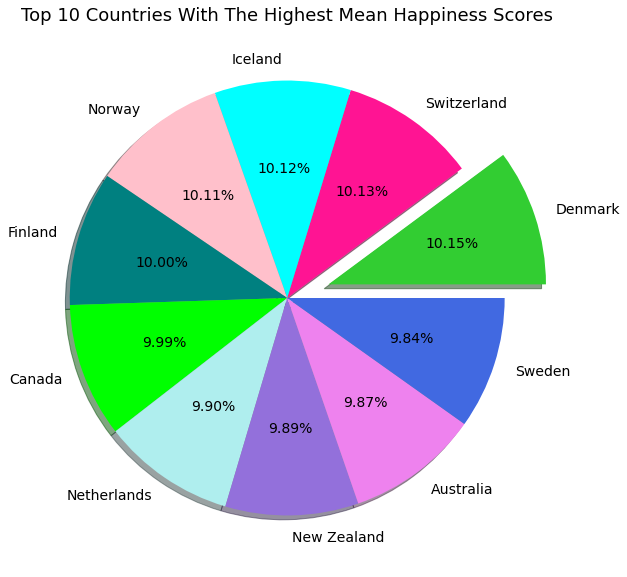

In [17]:
plt.figure(figsize=(10,10))
plt.pie(x=df_country['happiness_score'], labels=df_country['country'], autopct='%1.2f%%', pctdistance=0.6,labeldistance=1.1,shadow=True, colors=['limegreen', 'deeppink','cyan','pink', 'teal', 'lime','paleturquoise', 'mediumpurple','violet','royalblue'], textprops={'fontsize':14}, explode=(0.2,0,0,0,0,0,0,0,0,0))
plt.title('Top 10 Countries With The Highest Mean Happiness Scores', fontsize=18)
plt.show()

It can be seen that the highest mean happiness score among the countries is related to Denmark.

We visualize the relationship between happiness_score, economy, family, health and freedom.

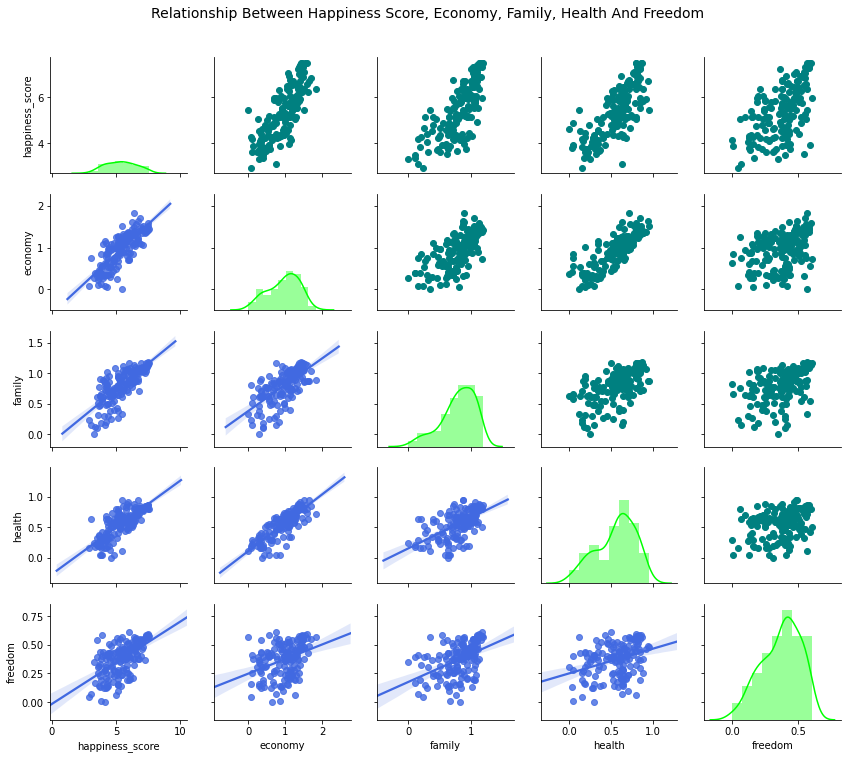

In [18]:
n=sns.PairGrid(df, x_vars=['happiness_score','economy','family','health','freedom'],y_vars=['happiness_score','economy','family','health','freedom'],height=2, aspect=1.2)
n.map_upper(plt.scatter,color='teal')
n.map_diag(sns.distplot,color='lime')
n.map_lower(sns.regplot,color='royalblue')
plt.suptitle('Relationship Between Happiness Score, Economy, Family, Health And Freedom',y=1.05,fontsize=14)
plt.show()

Let's visualize the relationship between happiness_score, trust, generosity, and dystopia_residual.

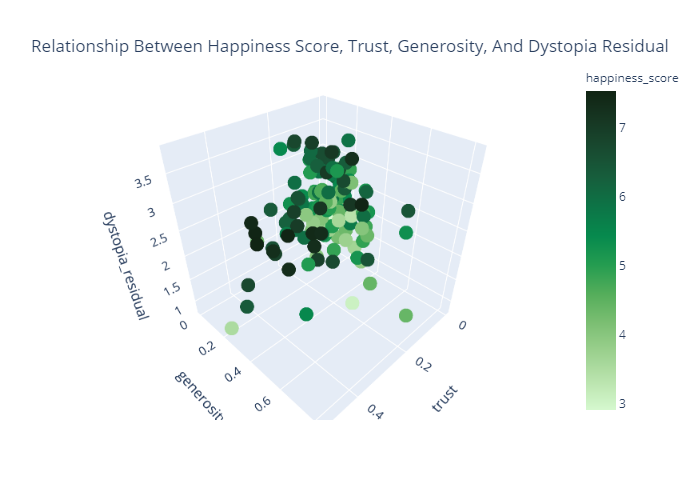

In [19]:
fig=px.scatter_3d(data_frame=df, x='trust', y='generosity', z='dystopia_residual', color='happiness_score',color_continuous_scale='algae')
fig.update_layout(
    title={
        'text': 'Relationship Between Happiness Score, Trust, Generosity, And Dystopia Residual',
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
Image(pio.to_image(fig,format='png'))

As mentioned before, economy plays the most significant role in contributing to happiness. So here we explore its influence in different regions throughout the world.

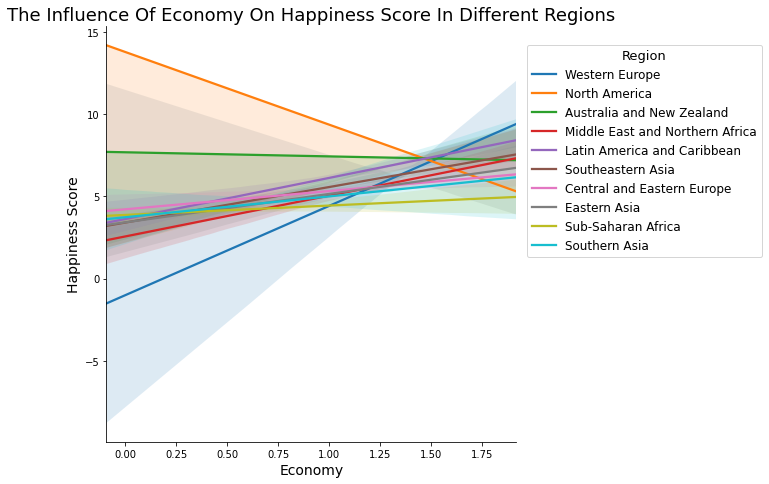

In [20]:
sns.lmplot (x='economy', y='happiness_score', data=df, scatter=False, hue='region', legend=False, height=6.5)
plt.title('The Influence Of Economy On Happiness Score In Different Regions', fontsize=18)
plt.legend(title='Region', fontsize=12, title_fontsize=13, bbox_to_anchor=(1.6,0.7), borderaxespad=0, loc='right')
plt.xlabel('Economy', fontsize=14)
plt.ylabel('Happiness Score', fontsize=14)
plt.show()

We can see that except for North America and Australia and New Zealand, happiness scores increase with economy.

## 5. Predicting Happiness Score

In this section, we will implement several machine learning algorithms to predict happiness score.

### 5.1. Encoding Categorical Variables

**Country**

In [21]:
le1=LabelEncoder()
le1.fit(df['country'])
df['country']=le1.transform(df['country'])

**Region**

In [22]:
le2=LabelEncoder()
le2.fit(df['region'])
df['region']=le2.transform(df['region'])

### 5.2. Splitting the Data

 First, we should split our dataset into training and test set. Our dependent variable is happiness score, and the independent variables are country, continent,family, economy, health, trust, freedom, generosity, and dystopia residual.

In [23]:
X=df[['country', 'region', 'economy','family', 'health', 'freedom', 'trust', 'generosity','dystopia_residual']]
y=df['happiness_score']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 5.3. Linear Regression

In [25]:
lr=LinearRegression()
lr.fit(X,y)
predictions_lr=lr.predict(X_test)

In [26]:
print('MAE_Linear Regression=', metrics.mean_absolute_error(y_test,predictions_lr))
print('MSE_Linear Regression=', metrics.mean_squared_error(y_test,predictions_lr))
print('RMSE_Linear Regression=', np.sqrt(metrics.mean_squared_error(y_test,predictions_lr)))
print('MAPE_Linear Regression=', 100*metrics.mean_absolute_error(y_test,predictions_lr)/df['happiness_score'].mean())
print('R2 Score_Linear Regression=',metrics.r2_score(y_test,predictions_lr))

MAE_Linear Regression= 0.0002399996837818182
MSE_Linear Regression= 7.444971246571613e-08
RMSE_Linear Regression= 0.00027285474609344094
MAPE_Linear Regression= 0.004459149891035353
R2 Score_Linear Regression= 0.999999927510088


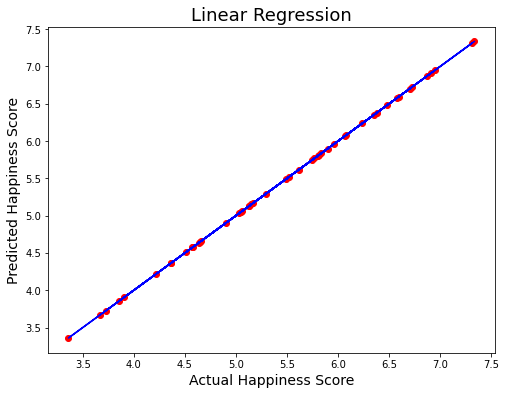

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predictions_lr, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

### 5.4. Decision Tree Regression 

In [28]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
predictions_dtr=dtr.predict(X_test)

In [29]:
print('MAE_Decision Tree Regression=', metrics.mean_absolute_error(y_test,predictions_dtr))
print('MSE_Decision Tree Regression=', metrics.mean_squared_error(y_test,predictions_dtr))
print('RMSE_Decision Tree Regression=', np.sqrt(metrics.mean_squared_error(y_test,predictions_dtr)))
print('MAPE_Decision Tree Regression=', 100*metrics.mean_absolute_error(y_test,predictions_dtr)/df['happiness_score'].mean())
print('R2 Score_Decision Tree Regression=',metrics.r2_score(y_test,predictions_dtr))

MAE_Decision Tree Regression= 0.4678958333333334
MSE_Decision Tree Regression= 0.34468535416666674
RMSE_Decision Tree Regression= 0.5870991008055342
MAPE_Decision Tree Regression= 8.693418346838218
R2 Score_Decision Tree Regression= 0.6643880795772833


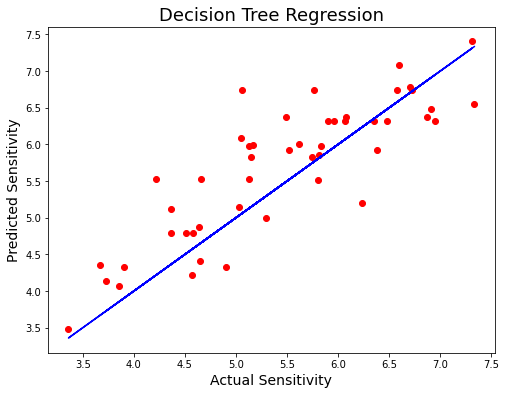

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=predictions_dtr, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Sensitivity',fontsize=14)
plt.ylabel('Predicted Sensitivity',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

### 5.5. Random Forest Regression

In [31]:
rfr=RandomForestRegressor(n_estimators=200)
rfr.fit(X_train,y_train)
predictions_rfr=rfr.predict(X_test)

In [32]:
print('MAE_Random Forest Regression=', metrics.mean_absolute_error(y_test,predictions_rfr))
print('MSE_Random Forest Regression=', metrics.mean_squared_error(y_test,predictions_rfr))
print('RMSE_Random Forest Regression=', np.sqrt(metrics.mean_squared_error(y_test,predictions_rfr)))
print('MAPE_Random Forest Regression=', 100*metrics.mean_absolute_error(y_test,predictions_rfr)/df['happiness_score'].mean())
print('R2 Score_Random Forest Regression=',metrics.r2_score(y_test,predictions_rfr))

MAE_Random Forest Regression= 0.33027187499999927
MSE_Random Forest Regression= 0.15613463052708265
RMSE_Random Forest Regression= 0.3951387484505698
MAPE_Random Forest Regression= 6.136390566068983
R2 Score_Random Forest Regression= 0.8479754287141887


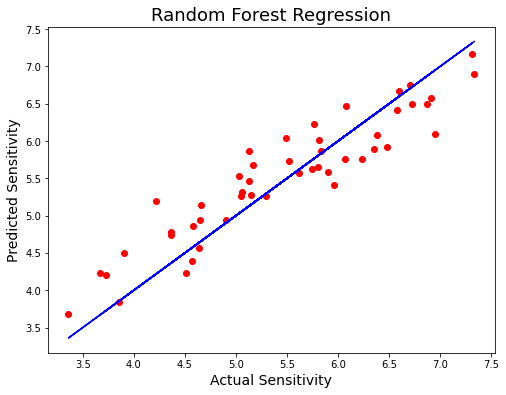

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=predictions_rfr, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Sensitivity',fontsize=14)
plt.ylabel('Predicted Sensitivity',fontsize=14)
plt.title('Random Forest Regression' ,fontsize=18)
plt.show()

### 5.6. Support Vector Regression

In [34]:
svr=SVR(gamma='auto')
svr.fit(X_train,y_train)
predictions_svr=svr.predict(X_test)

In [35]:
print('MAE_Support Vector Regression=', metrics.mean_absolute_error(y_test,predictions_svr))
print('MSE_Support Vector Regression=', metrics.mean_squared_error(y_test,predictions_svr))
print('RMSE_Support Vector Regression=', np.sqrt(metrics.mean_squared_error(y_test,predictions_svr)))
print('MAPE_Support Vector Regression=', 100*metrics.mean_absolute_error(y_test,predictions_svr)/df['happiness_score'].mean())
print('R2 Score_Support Vector Regression=',metrics.r2_score(y_test,predictions_svr))

MAE_Support Vector Regression= 0.8074779346634332
MSE_Support Vector Regression= 0.9652623702335479
RMSE_Support Vector Regression= 0.9824776690762737
MAPE_Support Vector Regression= 15.002791202180234
R2 Score_Support Vector Regression= 0.06014701852048465


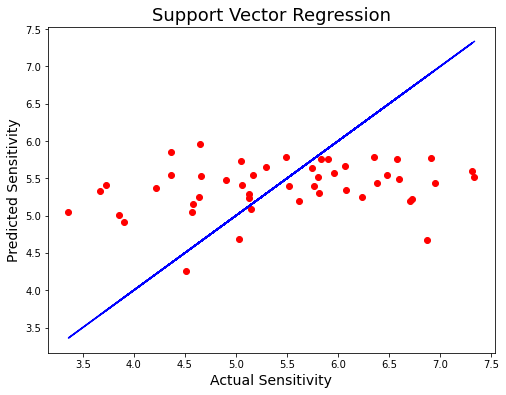

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=predictions_svr, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Sensitivity',fontsize=14)
plt.ylabel('Predicted Sensitivity',fontsize=14)
plt.title('Support Vector Regression',fontsize=18)
plt.show()

### 5.7. XGBoost Regression

In [37]:
xgbr= xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
xgbr.fit(X_train,y_train)
predictions_xgbr=xgbr.predict(X_test)

In [38]:
print('MAE_XGBoost Regression=', metrics.mean_absolute_error(y_test,predictions_xgbr))
print('MSE_XGBoost Regression=', metrics.mean_squared_error(y_test,predictions_xgbr))
print('RMSE_XGBoost Regression=', np.sqrt(metrics.mean_squared_error(y_test,predictions_xgbr)))
print('MAPE_XGBoost Regression=', 100*metrics.mean_absolute_error(y_test,predictions_xgbr)/df['happiness_score'].mean())
print('R2 Score_XGBoost Regression=',metrics.r2_score(y_test,predictions_svr))

MAE_XGBoost Regression= 0.2806015039285024
MSE_XGBoost Regression= 0.11446834892027113
RMSE_XGBoost Regression= 0.33833171432821835
MAPE_XGBoost Regression= 5.213524226159539
R2 Score_XGBoost Regression= 0.06014701852048465


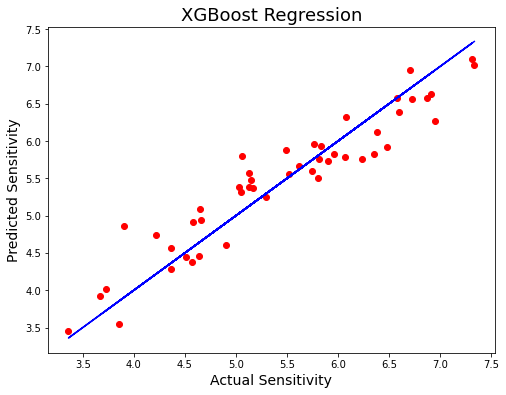

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=predictions_xgbr, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Sensitivity',fontsize=14)
plt.ylabel('Predicted Sensitivity',fontsize=14)
plt.title('XGBoost Regression',fontsize=18)
plt.show()

So we conclude that Linear Regression with the R2 Score of 99.99% is the best model for predicting the happiness score across the world.

## 6. Conclusion

-  We performed Exploratory Data Analysis and visualized the impacts of various features on happiness score throughout the world.

-  Linear Regression algorithm with the R2 Score of 99.99% was the best model for predicting  the happiness score across in the world.